In [90]:
# 이진 분류 예제(영화 리뷰 분류)
import keras
print(keras.__version__)

2.10.0


In [91]:
from keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000) # Will bring the 10,000 most used(or popular) words

In [92]:
train_data.shape

(25000,)

In [93]:
train_data[0] # 25,000 * 10,000(we select)

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [94]:
train_labels[0] # 1 for positive reviews, 0 for negative review

1

In [95]:
# Since 2진분류(Binary Classification) problem, will use sigmoid function

# Will check actual review in word form(numbers array -> words)
word_index = imdb.get_word_index()  
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items()) # (key, value) = ("kid", 26338)

In [96]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
# i-3 is because 0~2 has some uesless symbols ex) \n, whitespace, #$!@#

In [97]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [98]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [99]:
type(reverse_word_index)

dict

In [100]:
# enumerate practice
for i, c in enumerate(['A','B','C'], start=1):
    print(i, c)

1 A
2 B
3 C


In [101]:
tmp = enumerate(['A','B','C'])
list(tmp)

[(0, 'A'), (1, 'B'), (2, 'C')]

In [102]:
tmp = enumerate(['A','B','C'])
next(tmp)
next(tmp)

(1, 'B')

In [103]:
# Data Processing to make one-hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    # will create 25,000 x 10,000 size array covered with '0'
    results = np.zeros((len(sequences), dimension)) 
    
    # basically, find a word in sequences, and change the index value from '0' to '1'
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    
    return results


In [104]:
# Data Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [105]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [106]:
# change the data type from 'int' to 'float'
y_train=np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [107]:
# Build Neural Network
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [108]:
from keras import optimizers

# With the keras optimizers, it will prevent the overflow trainning
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [109]:
# Divide the trainning data set by two seperate data set 
# *** So that user can train and validate at the same time ***
# Good dataset has 3 seperate dataset => Trainning, Validation, Test

x_validation = x_train[:10000] # bring first 10,000 data from 25,000 train data
x_train_left = x_train[10000:] # left over 15,000 train values

y_validation = y_train[:10000]
y_train_left = y_train[10000:]

In [110]:
# Now use .fit to start the ML(but, this time with Validation at the same time!)
history = model.fit(x_train_left, y_train_left, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5020 - accuracy: 0.7962 - val_loss: 0.3767 - val_accuracy: 0.8746
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2967 - accuracy: 0.9065 - val_loss: 0.2997 - val_accuracy: 0.8899
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2187 - accuracy: 0.9284 - val_loss: 0.2839 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1699 - accuracy: 0.9447 - val_loss: 0.2934 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1425 - accuracy: 0.9535 - val_loss: 0.2932 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1160 - accuracy: 0.9655 - val_loss: 0.2985 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0995 - accuracy: 0.9697 - val_loss: 0.3242 - val_accuracy: 0.8776
Epoch 8/20
30

In [111]:
# Train Result!

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

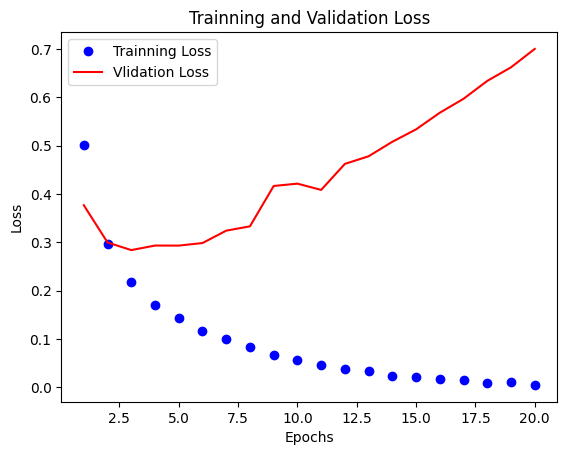

In [112]:
# Data Visualization
import matplotlib.pyplot as plt

# Check the Loss and Validation Loss
plt.plot(epochs, loss, 'bo', label='Trainning Loss')
plt.plot(epochs, val_loss, 'r-', label='Vlidation Loss')
plt.title('Trainning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [113]:
'''
From the Graph Above, we can observe that Trainning loss is decreasing!
Which means that Machine is learning much more close to the trainning set.add
However, From the validation loss, we can observe that at certain point(between 2.5~4), 
the Validation loss value decreased then increased.
This graphs indicates user where to stop the Epochs to make a most accurate (not polarized to the train set) Machine Learning
'''

'\nFrom the Graph Above, we can observe that Trainning loss is decreasing!\nWhich means that Machine is learning much more close to the trainning set.add\nHowever, From the validation loss, we can observe that at certain point(between 2.5~4), \nthe Validation loss value decreased then increased.\nThis graphs indicates user where to stop the Epochs to make a most accurate (not polarized to the train set) Machine Learning\n'

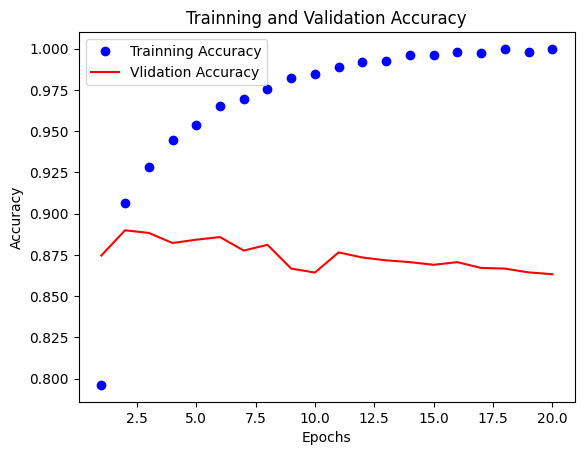

In [114]:
# Check the Accuracy and Valication Accuracy
plt.plot(epochs, acc, 'bo', label='Trainning Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Vlidation Accuracy')
plt.title('Trainning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [115]:
# Let's run again with epoch = 3
# Need to run from the model
# Else it will run previous runtime(=30) + new epochs(+3)
# So total 33 time!! which will make it worse...

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_validation = x_train[:10000] 
x_train_left = x_train[10000:] 

y_validation = y_train[:10000]
y_train_left = y_train[10000:]

history = model.fit(x_train_left, y_train_left, epochs=3, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/3
30/30 [==============================] - 1s 21ms/step - loss: 0.5426 - accuracy: 0.7875 - val_loss: 0.4223 - val_accuracy: 0.8671
Epoch 2/3
30/30 [==============================] - 0s 12ms/step - loss: 0.3390 - accuracy: 0.8965 - val_loss: 0.3276 - val_accuracy: 0.8769
Epoch 3/3
30/30 [==============================] - 0s 10ms/step - loss: 0.2425 - accuracy: 0.9233 - val_loss: 0.3249 - val_accuracy: 0.8679


In [116]:
# Train Result!

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

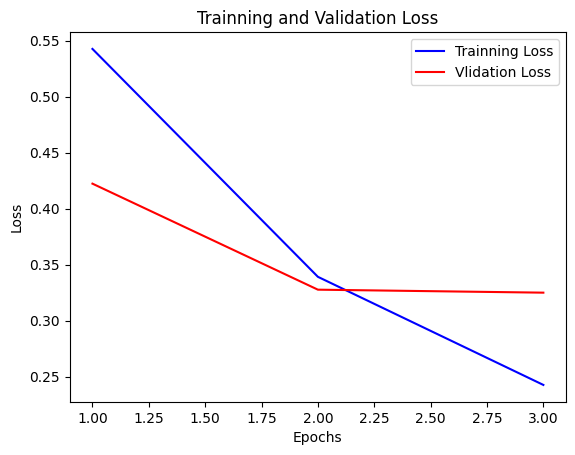

In [117]:
# Data Visualization
import matplotlib.pyplot as plt

# Check the Loss and Validation Loss
plt.plot(epochs, loss, 'b-', label='Trainning Loss')
plt.plot(epochs, val_loss, 'r-', label='Vlidation Loss')
plt.title('Trainning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

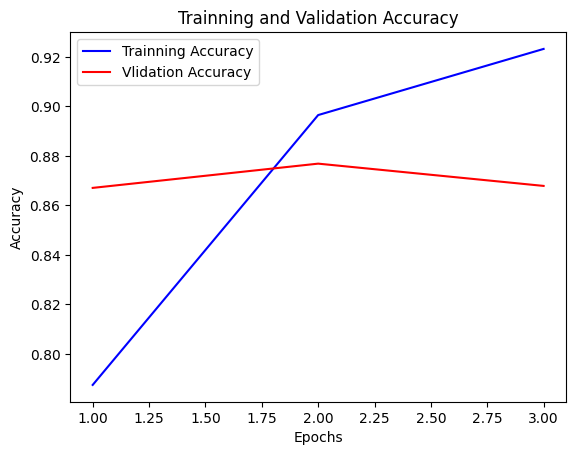

In [118]:
# Check the Accuracy and Valication Accuracy
plt.plot(epochs, acc, 'b-', label='Trainning Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Vlidation Accuracy')
plt.title('Trainning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [119]:
'''
From the practice above, 
We can observe that if Machine Learn too much with the tarinning data set
The trainning itself could polarize towards the trainning set ('Overfit')

To prevent this problem, check out "optimizer=optimizers.RMSprop(lr=0.001)" parts above!!
'''

'\nFrom the practice above, \nWe can observe that if Machine Learn too much with the tarinning data set\nThe trainning itself could polarize towards the trainning set (\'Overfit\')\n\nTo prevent this problem, check out "optimizer=optimizers.RMSprop(lr=0.001)" parts above!!\n'